In [1]:
import csv
import pandas as pd
import json
import re

In [2]:
# CSV_PATH = "/home/slwanna/code_projects/llm-dep-parser/results/tacoplay/step_1_full_results.csv"
CSV_PATH = "/home/slwanna/code_projects/llm-dep-parser/results/rt1/rt1_dep_parse_results.csv"
df = pd.read_csv(CSV_PATH)

In [3]:
df["llm_response"].head()

0    \n    Perform dependency parsing on the follow...
1    \n    Perform dependency parsing on the follow...
2    \n    Perform dependency parsing on the follow...
3    \n    Perform dependency parsing on the follow...
4    \n    Perform dependency parsing on the follow...
Name: llm_response, dtype: object

In [4]:
def extract_json_from_response(response):
    """
    Extracts the second JSON object from a given response string.
    """
    # Regular expression to find JSON blocks in the response
    json_pattern = re.findall(r'```json\s*({.*?})\s*```', response, re.DOTALL)

    # Return the second JSON block if found
    if len(json_pattern) >= 2:
        try:
            return json.loads(json_pattern[1])  # Parse to ensure valid JSON
        except json.JSONDecodeError:
            return None  # Return None if JSON is invalid
    return None  # No valid JSON found

In [5]:
# Apply extraction function to each row in the llm_response column
df["parsed_json"] = df["llm_response"].apply(lambda x: extract_json_from_response(str(x)))

# Save the updated DataFrame to a new CSV file
output_file_path = "/home/slwanna/code_projects/llm-dep-parser/results/tacoplay/tacoplay_dep_parse_results_with_extracted_json.csv"
df.to_csv(output_file_path, index=False, quoting=csv.QUOTE_ALL)

print(f"Processed CSV saved as: {output_file_path}")


Processed CSV saved as: /home/slwanna/code_projects/llm-dep-parser/results/tacoplay/tacoplay_dep_parse_results_with_extracted_json.csv


598


/tmp/ipykernel_98424/3466010137.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pattern_df["POS Pattern"].head(10), y=pattern_df["Count"].head(10), palette="viridis")


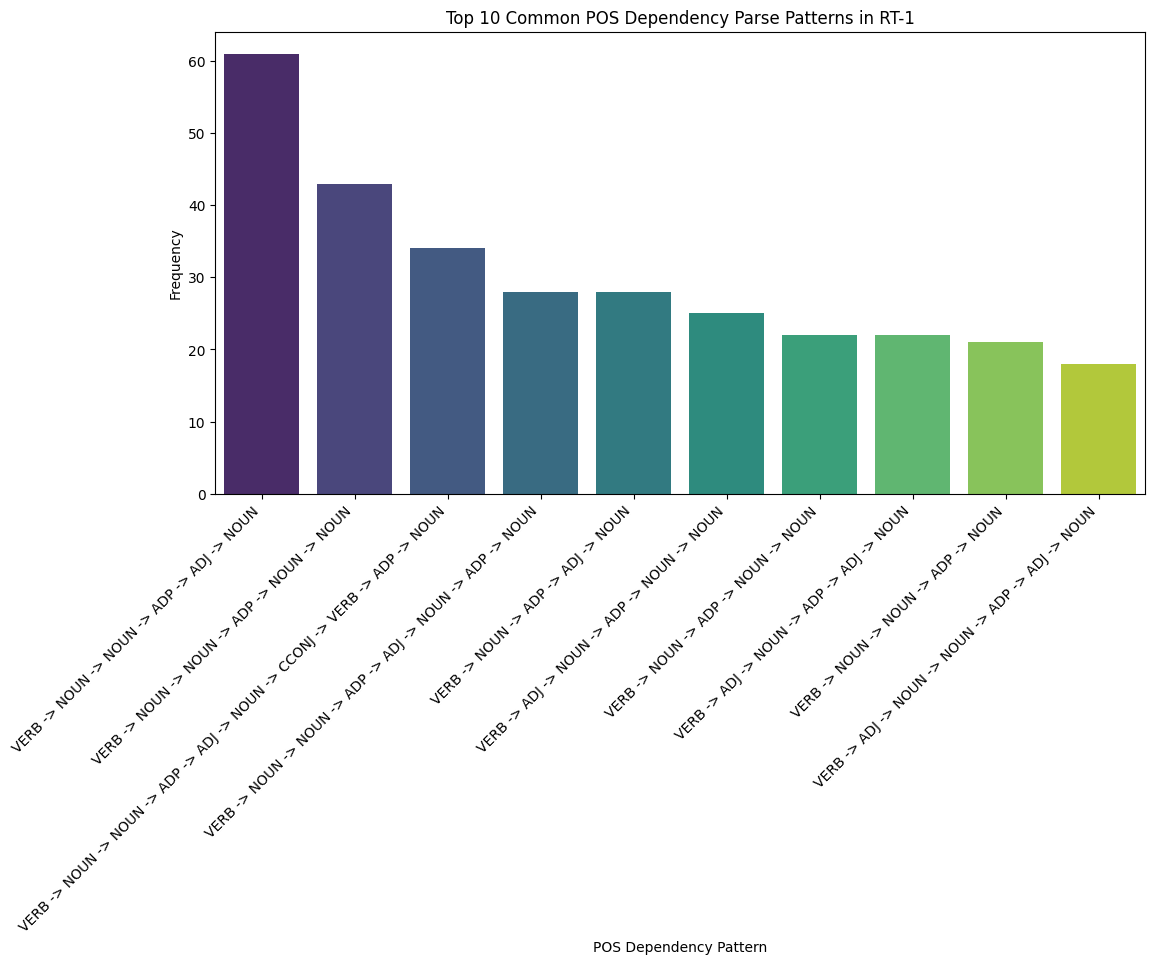

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

print(len(df["parsed_json"].dropna()))

# Step 2: Extract POS Sequence Patterns
pos_patterns = []

for row in df["parsed_json"].dropna():
    tokens = row.get("tokens", [])
    
    # Extract only POS tags to form a pattern
    pattern = " -> ".join([token["pos"] for token in tokens])
    
    # Store the pattern
    pos_patterns.append(pattern)

# Count the frequency of unique POS dependency patterns
pattern_counts = Counter(pos_patterns)

# Convert to a DataFrame for analysis
pattern_df = pd.DataFrame(pattern_counts.items(), columns=["POS Pattern", "Count"]).sort_values(by="Count", ascending=False)

# Step 3: Visualization - Histogram of Common POS Dependency Parse Patterns
plt.figure(figsize=(12, 6))
sns.barplot(x=pattern_df["POS Pattern"].head(10), y=pattern_df["Count"].head(10), palette="viridis")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.ylabel("Frequency")
plt.xlabel("POS Dependency Pattern")
plt.title("Top 10 Common POS Dependency Parse Patterns in RT-1")
plt.show()

